In [1]:
result = "./results/sc2_15b_testrun.json.gz"
result

'./results/sc2_15b_testrun.json.gz'

In [4]:
from metrics import get_fmt_at_k_e
from utils import gunzip_json_read
obj = gunzip_json_read(result)
obj.keys()

dict_keys(['items', 'model', 'max_priors', 'format', 'temperature', 'top_p', 'max_tokens', 'completion_limit'])

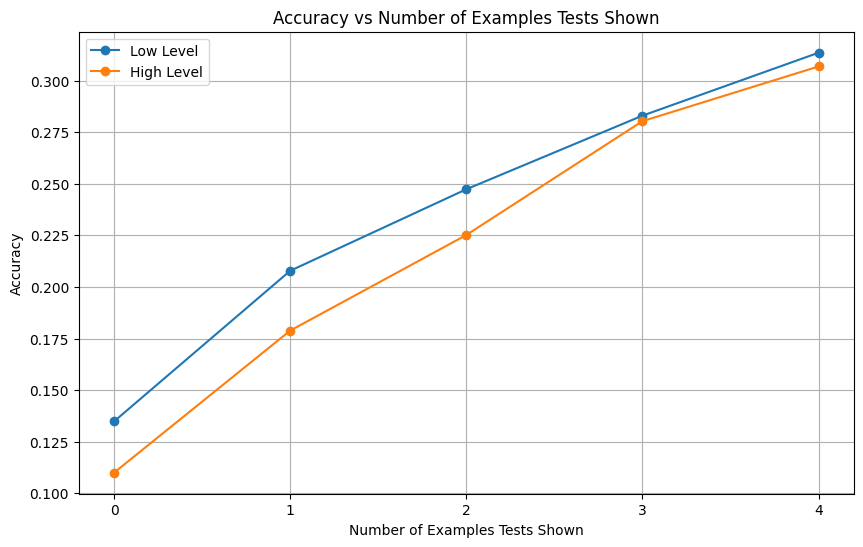

In [8]:
e_to_lo_acc = {}
e_to_hi_acc = {}

items = obj["items"]

for e in range(0, obj["max_priors"]):
    lo_accs = []
    hi_accs = []
    for item in items:
        lo_accs.extend([get_fmt_at_k_e(lo, e, k=1) for lo in item["los"]])
        hi_accs.extend([get_fmt_at_k_e(hi, e, k=1) for hi in item["his"]])
    
    e_to_lo_acc[e] = sum(lo_accs) / len(lo_accs) if lo_accs else 0
    e_to_hi_acc[e] = sum(hi_accs) / len(hi_accs) if hi_accs else 0

import matplotlib.pyplot as plt

# Extract x and y values for both curves
x_values = list(e_to_lo_acc.keys())
y_lo_values = list(e_to_lo_acc.values())
y_hi_values = list(e_to_hi_acc.values())

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_lo_values, label='Low Level', marker='o')
plt.plot(x_values, y_hi_values, label='High Level', marker='o')

# Customize the plot
plt.xlabel('Number of Examples Tests Shown')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Examples Tests Shown')
plt.legend()
plt.grid(True)
plt.xticks(x_values)

# Show the plot
plt.show()


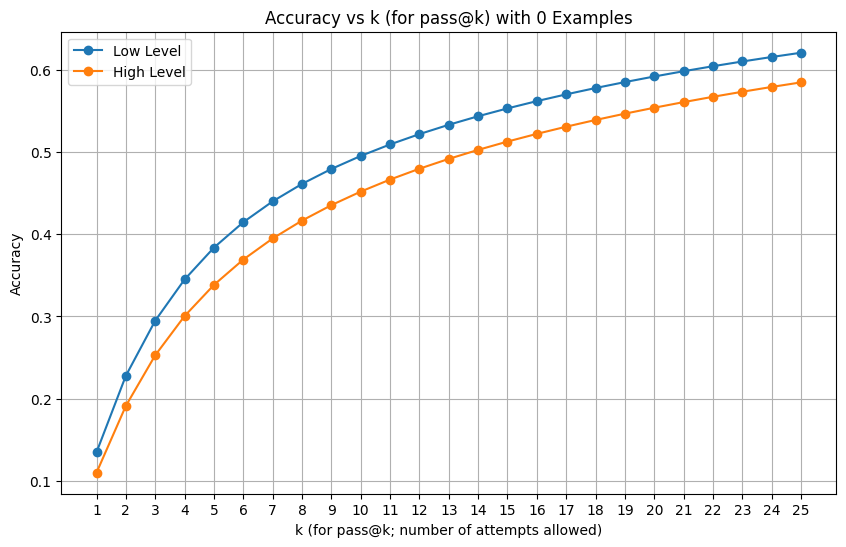

In [18]:
# Define the range for k
k_range = range(1, 26)

# Calculate accuracies for different k values
k_to_lo_acc = {}
k_to_hi_acc = {}

for k in k_range:
    lo_accs = []
    hi_accs = []
    for item in items:
        lo_accs.extend([get_fmt_at_k_e(lo, e=0, k=k) for lo in item["los"]])
        hi_accs.extend([get_fmt_at_k_e(hi, e=0, k=k) for hi in item["his"]])
    
    k_to_lo_acc[k] = np.mean(lo_accs) if lo_accs else 0
    k_to_hi_acc[k] = np.mean(hi_accs) if hi_accs else 0

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(k_range, list(k_to_lo_acc.values()), label='Low Level', marker='o')
plt.plot(k_range, list(k_to_hi_acc.values()), label='High Level', marker='o')

# Customize the plot
plt.xlabel('k (for pass@k; number of attempts allowed)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs k (for pass@k) with 0 Examples')
plt.legend()
plt.grid(True)
plt.xticks(k_range)

# Show the plot
plt.show()


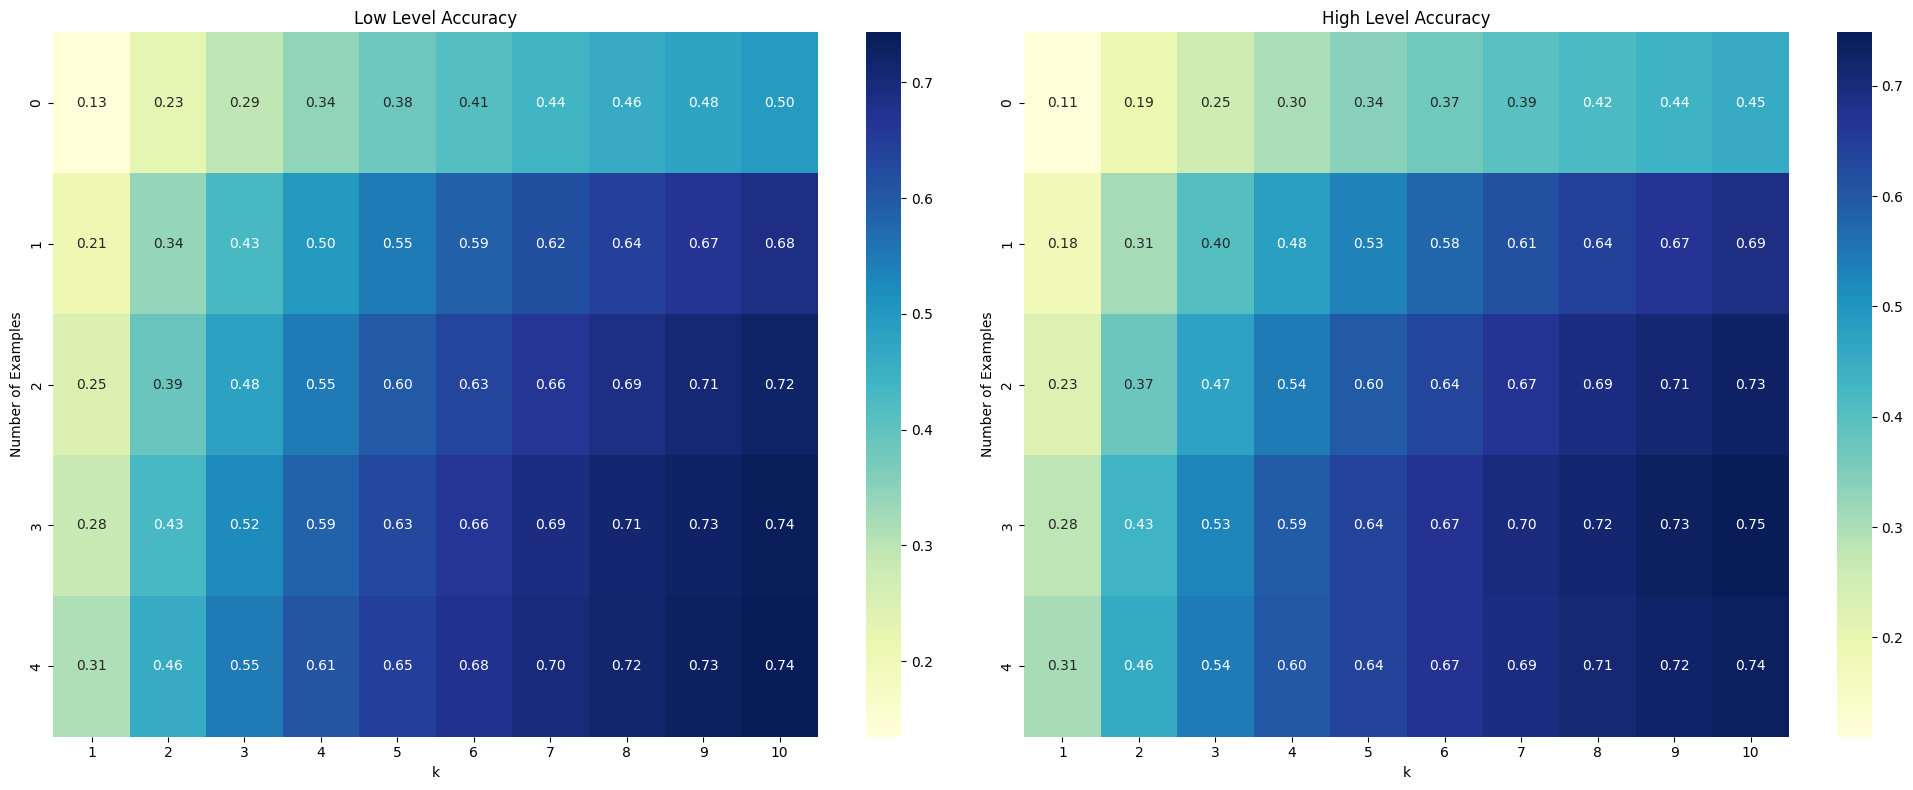

In [16]:
import numpy as np
import seaborn as sns

# Define the range for e and k
e_range = range(0, obj["max_priors"])
k_range = range(1, 11)  # 1 to 10

# Create empty matrices for hi and lo accuracies
hi_matrix = np.zeros((len(e_range), len(k_range)))
lo_matrix = np.zeros((len(e_range), len(k_range)))

# Fill the matrices
for i, e in enumerate(e_range):
    for j, k in enumerate(k_range):
        lo_accs = []
        hi_accs = []
        for item in items:
            lo_accs.extend([get_fmt_at_k_e(lo, e, k) for lo in item["los"]])
            hi_accs.extend([get_fmt_at_k_e(hi, e, k) for hi in item["his"]])
        
        lo_matrix[i, j] = np.mean(lo_accs) if lo_accs else 0
        hi_matrix[i, j] = np.mean(hi_accs) if hi_accs else 0

# Create the heatmaps
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

sns.heatmap(lo_matrix, ax=ax1, cmap="YlGnBu", annot=True, fmt=".2f", 
            xticklabels=k_range, yticklabels=e_range)
ax1.set_title("Low Level Accuracy")
ax1.set_xlabel("k")
ax1.set_ylabel("Number of Examples")

sns.heatmap(hi_matrix, ax=ax2, cmap="YlGnBu", annot=True, fmt=".2f", 
            xticklabels=k_range, yticklabels=e_range)
ax2.set_title("High Level Accuracy")
ax2.set_xlabel("k")
ax2.set_ylabel("Number of Examples")

plt.tight_layout()
plt.show()
